# Example of XmR control charts

Process behaviour charts are used to determine if the variation of a process is stable and predictable, that is, in a state of statistical control. In-control variation arises from chance or common causes. No changes or adjustments to the process are needed. The charts can be used to predict future performance. Out-of-control variation arises from special or assignable causes. These charts help identify the special causes in order minimize or eliminate their effect.

For the X chart, data are collected using rational sampling of size 1. The individual values are plotted in time order. A central line (average) and control limits above and below the central line are plotted.

$$
    \begin{align}
        UCL_X, LCL_X & = \overline{X} \pm 3 \times \text{Sigma(X)} \\
                     & = \overline{X} \pm 3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_2$ can be found in tables of control chart constants. It is a rescaling constant that changes an average range to a standard deviation. The value of $d_2$ changes as the subgroup size n changes. It is common to use a moving range subgroup size 2.

 The moving range between successive pairs of points are calculated and plotted on the mR chart. A central line (average moving range) and control limits above and below the central line are plotted.
    
$$
    \begin{align}
        UCL_R, LCL_R & = \overline{R} \pm 3 \times \text{Sigma(R)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \text{Sigma(X)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_3$ can be found in tables of control chart constants. It is a rescaling constant that changes a a standard deviation of individual values to a standard deviation of range values. The value of $d_3$ is a function of sugroup size.

# Datasense library

## First-time user

Do this if this is your first-time installation.

pip install --user -e "git+https://github.com/gillespilon/datasense#egg=datasense"

## Updating the library

Do this if you are updating a previous-installed version of datasense.

pip install --user --upgrade -e "git+https://github.com/gillespilon/datasense#egg=datasense"

# Data

In this notebook, a data set is created in the notebook. There is a function if you wish to read your data from a csv file.

# Control chart rules

Rules one, two, three (under development), and four can be applied to the X control chart.

Rule one can be applied to the mR control chart.

# Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from datasense import control_charts as cc

In [3]:
x_chart_title = 'Individuals Control Chart'
x_chart_ylabel = 'Measurement X (units)'
x_chart_xlabel = 'Sample'

In [4]:
mr_chart_title = 'Moving Range Control Chart'
mr_chart_ylabel = 'Measurement mR (units)'
mr_chart_xlabel = 'Sample'

In [5]:
def main():
    data = create_data()  # use the data in this notebook
##    data = read_data('x_mr_example.csv')  # read a csv file
#     data = read_excel('x_mr_example.xlsx')  # read an xlsx file
    x_chart(data)
    mr_chart(data)

In [6]:
def create_data() -> pd.DataFrame:
    '''
    Create a dataframe.
    This function is for demonstration purposes.
    In a production environment, replace this with reading data from a file.
    These data will show one point for rule one. Need to create same for
    other rules.
    '''
    df = {
        'Sample':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
        'X':       [25.0, 24.0, 35.5, 19.4, 20.1, 13.9, 13.9,
                    10.0, 13.3, 10.0, 16.0, 16.0, 16.0]
    }
    df = pd.DataFrame(df)
    return df

In [7]:
def read_data(filename: str) -> pd.DataFrame:
    '''
    Create a dataframe.
    This function reads a csv file.
    These data will show one point for rule one.
    '''
    df = pd.read_csv(filename, index_col='Sample')
    return df

In [8]:
def read_excel(filename: str) -> pd.DataFrame:
    '''
    Create a dataframe.
    This function reads a csv file.
    These data will show one point for rule one.
    '''
    df = pd.read_excel(filename, index_col='Sample')
    return df

In [9]:
def x_chart(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(8, 6))
    x = cc.X(df[['X']], subgroup_size=2)
    ax = x.ax(fig)
    cc.draw_rule(x, ax, *cc.points_one(x), '1')
    cc.draw_rule(x, ax, *cc.points_four(x), '4')
    cc.draw_rule(x, ax, *cc.points_two(x), '2')
    ax.set_title(x_chart_title)
    ax.set_ylabel(x_chart_ylabel)
    ax.set_xlabel(x_chart_xlabel)
    ax.figure.savefig('x.svg')

In [10]:
def mr_chart(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(8, 6))
    mr = cc.mR(df[['X']], subgroup_size=2)
    ax = mr.ax(fig)
    cc.draw_rule(mr, ax, *cc.points_one(mr), '1')
    ax.set_title(mr_chart_title)
    ax.set_ylabel(mr_chart_ylabel)
    ax.set_xlabel(mr_chart_xlabel)
    ax.figure.savefig('mr.svg')

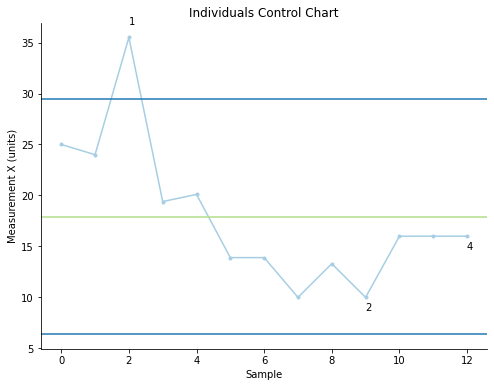

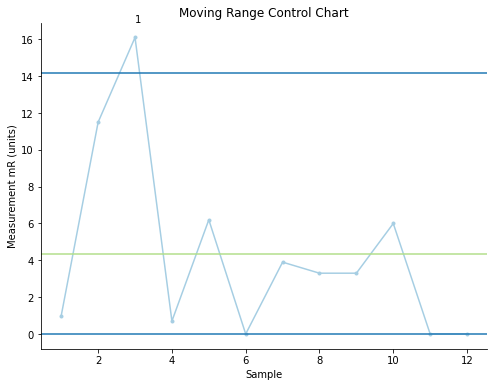

In [11]:
if __name__ == '__main__':
    main()